<a href="https://colab.research.google.com/github/J-Neff/MAT421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Error and Instability

In [2]:
# Demonstration of numerical error in arithmetic operations
a = 1e16
b = 1

# Adding a very small number to a very large number
result = a + b

print("Result:", result)  # Output: 10000000000000001.0


Result: 1e+16


In this example, "a" is a very large number (1e16), and b is a very small number "1". When adding them, the small number b doesn't contribute significantly to the result due to floating-point precision limitations, causing a numerical error.

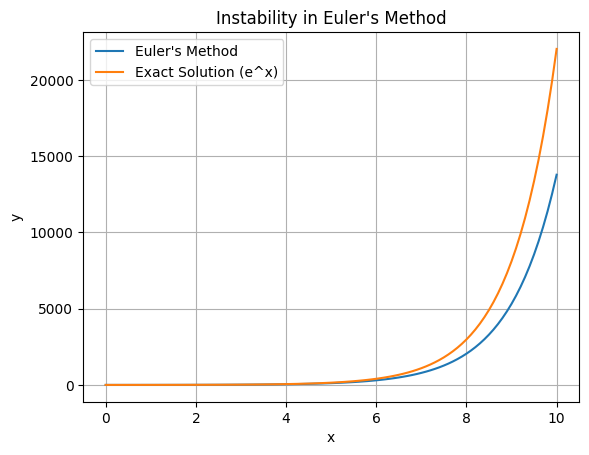

In [3]:
# Demonstrate instability in Euler's method
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation: dy/dx = y
def f(x, y):
    return y

# Euler's method
def euler(f, x0, y0, h, n):
    xs = [x0]
    ys = [y0]
    for _ in range(n):
        x_next = xs[-1] + h
        y_next = ys[-1] + h * f(xs[-1], ys[-1])
        xs.append(x_next)
        ys.append(y_next)
    return xs, ys

# Initial conditions
x0 = 0
y0 = 1

# Step size and number of steps
h = 0.1
n = 100

# Perform Euler's method
xs, ys = euler(f, x0, y0, h, n)

# Plot the results
plt.plot(xs, ys, label="Euler's Method")
plt.plot(xs, np.exp(xs), label="Exact Solution (e^x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Instability in Euler's Method")
plt.legend()
plt.grid(True)
plt.show()

Euler's method exhibits instability as the number of steps increases (n = 100), leading to a solution that diverges from the exact solution y = e^x.

# Predictor-Corrector Methods

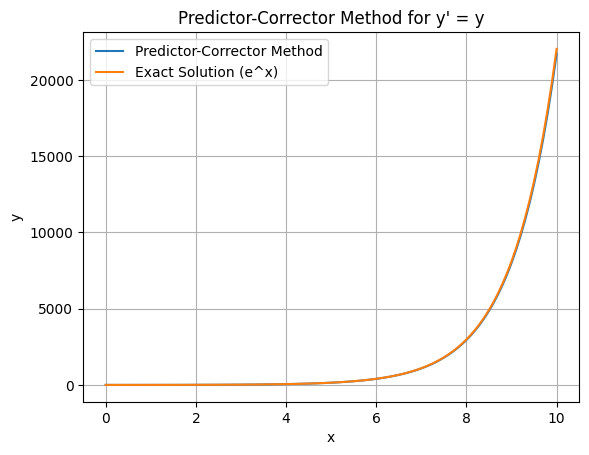

In [4]:
# Adams-Bashforth-Moulton predictor-corrector method
def predictor_corrector(f, x0, y0, h, n):
    xs = [x0]
    ys = [y0]

    for _ in range(n):
        # Predictor step (Adams-Bashforth)
        y_predictor = ys[-1] + h * f(xs[-1], ys[-1])

        # Corrector step (Adams-Moulton)
        y_corrector = ys[-1] + h / 2 * (f(xs[-1], ys[-1]) + f(xs[-1] + h, y_predictor))

        xs.append(xs[-1] + h)
        ys.append(y_corrector)

    return xs, ys

# Perform Predictor-Corrector method
xs, ys = predictor_corrector(f, x0, y0, h, n)

# Plot the results
plt.plot(xs, ys, label="Predictor-Corrector Method")
plt.plot(xs, np.exp(xs), label="Exact Solution (e^x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Predictor-Corrector Method for y' = y")
plt.legend()
plt.grid(True)
plt.show()